In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import nltk

In [2]:
from nltk.corpus import stopwords

In [3]:
#Lets visualize the data first

In [4]:
complaint_df=pd.read_json('complaints-2021-05-14_08_16.json')
complaint_df

,_index,_type,_id,_score,_source
0,complaint-public-v2,complaint,3211475,0,"{'tags': None, 'zip_code': '90301', 'complaint..."
1,complaint-public-v2,complaint,3229299,0,"{'tags': 'Servicemember', 'zip_code': '319XX',..."
2,complaint-public-v2,complaint,3199379,0,"{'tags': None, 'zip_code': '77069', 'complaint..."
3,complaint-public-v2,complaint,2673060,0,"{'tags': None, 'zip_code': '48066', 'complaint..."
4,complaint-public-v2,complaint,3203545,0,"{'tags': None, 'zip_code': '10473', 'complaint..."
...,...,...,...,...,...
78308,complaint-public-v2,complaint,3105617,0,"{'tags': None, 'zip_code': '08857', 'complaint..."
78309,complaint-public-v2,complaint,3091984,0,"{'tags': None, 'zip_code': '934XX', 'complaint..."
78310,complaint-public-v2,complaint,3133355,0,"{'tags': None, 'zip_code': '923XX', 'complaint..."
78311,complaint-public-v2,complaint,3110963,0,"{'tags': None, 'zip_code': None, 'complaint_id..."


In [5]:
complaint_df._index.value_counts()

_index
complaint-public-v2    78313
Name: count, dtype: int64

In [6]:
#dumping to different format to make it panda compatible in different notebook
#because directly loading the given json file didnot worked on the google colab


In [7]:
complaint_df.to_excel('complain.xlsx')
complaint_df.to_json('complaint.json')

In [8]:
complaint_df._type.value_counts()

_type
complaint    78313
Name: count, dtype: int64

In [9]:
complaint_df._score.value_counts()

_score
0    78313
Name: count, dtype: int64

### Cleaning extra columns that are not adding values and expanding the nesteddata  into the dataframe

In [10]:
complaint_df.drop(columns=['_type','_index','_score'],inplace=True)

In [11]:
def json_to_df_expandor(data):
    left_df=data['_id']
    right_df=data['_source']
    return pd.concat([left_df,pd.json_normalize(right_df)],axis=1)
    
final_df=json_to_df_expandor(complaint_df[['_id','_source']])

In [12]:
complaint_df.shape, final_df.shape

((78313, 2), (78313, 19))

In [13]:
final_df.head()

,_id,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,3211475,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,3229299,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,3199379,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,2673060,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,3203545,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


#### drop any column or row if everything iss empty there or mostly empty

In [14]:
final_df.dropna(how='all',axis=1)
final_df.dropna(how='all',axis=0)

,_id,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,3211475,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,3229299,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,3199379,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,2673060,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,3203545,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78308,3105617,None,08857,3105617,Closing an account,2018-12-20T12:00:00-05:00,NJ,N/A,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-12-21T12:00:00-05:00,None,Checking account,Yes,,Funds not received from closed account,Consent not provided
78309,3091984,None,934XX,3091984,"Other features, terms, or problems",2018-12-05T12:00:00-05:00,CA,N/A,Credit card or prepaid card,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Other problem,Consent provided
78310,3133355,None,923XX,3133355,Problem with a lender or other company chargin...,2019-01-25T12:00:00-05:00,CA,N/A,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-01-25T12:00:00-05:00,None,Checking account,Yes,I am not familiar with XXXX pay and did not un...,Transaction was not authorized,Consent provided
78311,3110963,None,None,3110963,"Other features, terms, or problems",2018-12-27T12:00:00-05:00,PA,N/A,Credit card or prepaid card,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-27T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I have had flawless credit for 30 yrs. I've ha...,Problem with balance transfer,Consent provided


In [15]:
final_df.isna().sum()

_id                              0
tags                         67413
zip_code                      6757
complaint_id                     0
issue                            0
date_received                    0
state                         1991
consumer_disputed                0
product                          0
company_response                 0
company                          0
submitted_via                    0
date_sent_to_company             0
company_public_response      78309
sub_product                  10571
timely                           0
complaint_what_happened          0
sub_issue                    46297
consumer_consent_provided     1008
dtype: int64

In [16]:
final_df.drop(columns=['_id','company_public_response'],inplace=True)

In [17]:
final_df.shape

(78313, 17)

In [18]:
final_df.head()

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,Conventional home mortgage,Yes,,None,Consent not provided
4,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [19]:
#seems like the data has the N/A value but being considered as a string estead of NOne so need to replace those
# to avoid being misinterpreted

In [20]:
final_df=final_df.applymap(lambda x : None if len(str(x))==0 or str(x).upper()=='N/A' else x)

In [21]:
final_df.isna().sum()

tags                         67413
zip_code                      6757
complaint_id                     0
issue                            0
date_received                    0
state                         1991
consumer_disputed            35683
product                          0
company_response                 0
company                          0
submitted_via                    0
date_sent_to_company             0
sub_product                  10571
timely                           0
complaint_what_happened      57241
sub_issue                    46297
consumer_consent_provided    43855
dtype: int64

In [23]:
#trying to see the non null data for the consumer consent column

In [22]:
final_df[~final_df['consumer_consent_provided'].isna()]['consumer_consent_provided']

0        Consent not provided
1            Consent provided
2            Consent provided
3        Consent not provided
10           Consent provided
                 ...         
78308    Consent not provided
78309        Consent provided
78310        Consent provided
78311        Consent provided
78312        Consent provided
Name: consumer_consent_provided, Length: 34458, dtype: object

In [24]:
final_df.isna().sum()

tags                         67413
zip_code                      6757
complaint_id                     0
issue                            0
date_received                    0
state                         1991
consumer_disputed            35683
product                          0
company_response                 0
company                          0
submitted_via                    0
date_sent_to_company             0
sub_product                  10571
timely                           0
complaint_what_happened      57241
sub_issue                    46297
consumer_consent_provided    43855
dtype: int64

In [25]:
final_df[~final_df['consumer_consent_provided'].isna()]['consumer_consent_provided']

0        Consent not provided
1            Consent provided
2            Consent provided
3        Consent not provided
10           Consent provided
                 ...         
78308    Consent not provided
78309        Consent provided
78310        Consent provided
78311        Consent provided
78312        Consent provided
Name: consumer_consent_provided, Length: 34458, dtype: object

In [26]:
final_df.head()

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,None,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,Credit card debt,Yes,None,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,None,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,None,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,None,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,Conventional home mortgage,Yes,None,None,Consent not provided
4,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,None,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,General-purpose credit card or charge card,Yes,None,Charged too much interest,None


#### getting rid of the empty or null complains this will also help in processing with ease

In [27]:
nonempty_complaints_df = final_df[~final_df.complaint_what_happened.isna()]
nonempty_complaints_df.head()

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,None,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,None,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
10,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,None,"Credit reporting, credit repair services, or o...",Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,Other personal consumer report,Yes,Chase Card was reported on XX/XX/2019. However...,Information belongs to someone else,Consent provided
11,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,None,"Credit reporting, credit repair services, or o...",Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XX...",Information belongs to someone else,Consent provided
14,None,920XX,3224980,Managing an account,2019-04-27T12:00:00-05:00,CA,None,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-27T12:00:00-05:00,Checking account,Yes,my grand son give me check for {$1600.00} i de...,Funds not handled or disbursed as instructed,Consent provided


In [28]:
nonempty_complaints_df.shape

(21072, 17)

In [29]:
#Now we are down to around 21K entry after getting rid of empty complaints

In [30]:
### downloading the prerequisited for the text processing

In [31]:
nltk.download('stopwords')
stop_word_list=stopwords.words('english')
import spacy
model=spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /home/prason/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2023-05-17 22:59:33.409866: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-17 22:59:33.411319: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 22:59:33.433919: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 22:59:33.434160: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appr

In [32]:
#defining the function to derieve cleaner text and lemma of the word in the document

In [41]:
def cleaning_text(x):
    x=x.lower()
    x=' '.join([word for word in [token.text for token in model(x)] if word not in stop_word_list and str(word).isalpha()])
    return x

def lemma_of_text(x):
    x=[token.lemma_ for token in model(x) if len(str(token).strip())>2]
    return x



In [35]:
#applying the transformation logic to derieve new columns

In [42]:
clean_df=nonempty_complaints_df[['complaint_id','complaint_what_happened']]
clean_df['clean_complain']=nonempty_complaints_df.complaint_what_happened.apply(lambda x : cleaning_text(x))


/tmp/ipykernel_27231/4124454561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['clean_complain']=nonempty_complaints_df.complaint_what_happened.apply(lambda x : cleaning_text(x))


In [44]:
clean_df['complain_lemma']=clean_df.clean_complain.apply(lambda x : lemma_of_text(x))
clean_df

/tmp/ipykernel_27231/447547821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['complain_lemma']=clean_df.clean_complain.apply(lambda x : lemma_of_text(x))


,complaint_id,complaint_what_happened,clean_complain,complain_lemma
1,3229299,Good morning my name is XXXX XXXX and I apprec...,good morning name xxxx xxxx appreciate could h...,"[good, morning, name, xxxx, xxxx, appreciate, ..."
2,3199379,I upgraded my XXXX XXXX card in XX/XX/2018 and...,upgraded xxxx xxxx card xx told agent upgrade ...,"[upgrade, xxxx, xxxx, card, tell, agent, upgra..."
10,3233499,Chase Card was reported on XX/XX/2019. However...,chase card reported xx however fraudulent appl...,"[chase, card, report, however, fraudulent, app..."
11,3180294,"On XX/XX/2018, while trying to book a XXXX XX...",xx trying book xxxx xxxx ticket came across of...,"[try, book, xxxx, xxxx, ticket, come, across, ..."
14,3224980,my grand son give me check for {$1600.00} i de...,grand son give check deposit chase account fun...,"[grand, son, give, check, deposit, chase, acco..."
...,...,...,...,...
78303,3094545,After being a Chase Card customer for well ove...,chase card customer well decade offered multip...,"[chase, card, customer, well, decade, offer, m..."
78309,3091984,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",wednesday xx xx xxxx called chas xxxx xxxx vis...,"[wednesday, xxxx, call, chas, xxxx, xxxx, visa..."
78310,3133355,I am not familiar with XXXX pay and did not un...,familiar xxxx pay understand great risk provid...,"[familiar, xxxx, pay, understand, great, risk,..."
78311,3110963,I have had flawless credit for 30 yrs. I've ha...,flawless credit yrs chase credit cards chase f...,"[flawless, credit, yrs, chase, credit, card, c..."


In [45]:
nonempty_complaints_df.head().complaint_what_happened.apply(lambda x : lemma_of_text(x))

1     [good, morning, name, XXXX, XXXX, and, appreci...
2     [upgrade, xxxx, xxxx, card, xx/2018, and, be, ...
10    [Chase, Card, be, report, XX/2019, however, fr...
11    [XX/2018, while, try, book, XXXX, xxxx, ticket...
14    [grand, son, give, check, for, 1600.00, deposi...
Name: complaint_what_happened, dtype: object

In [46]:
#getting rid of the unused object to reduce memory occupancy

In [47]:
del nonempty_complaints_df 

In [48]:
import spacy
model=spacy.load('en_core_web_sm')

In [49]:
clean_df.complain_lemma.head()

1     [good, morning, name, xxxx, xxxx, appreciate, ...
2     [upgrade, xxxx, xxxx, card, tell, agent, upgra...
10    [chase, card, report, however, fraudulent, app...
11    [try, book, xxxx, xxxx, ticket, come, across, ...
14    [grand, son, give, check, deposit, chase, acco...
Name: complain_lemma, dtype: object

In [50]:
[token.lemma_ for token in model("apple is good at working here in office")] #testing the code syntax

['apple', 'be', 'good', 'at', 'work', 'here', 'in', 'office']

In [51]:

MOST_COMMON_COUNT=50 #defining variable to be used at several places

### lets see the frequency distribution of the words and list down the common unigrams , bigrams and trigrams

In [52]:
from nltk.probability import FreqDist
all_words=[]
for row in clean_df.complain_lemma:
    all_words.extend(row)

result=FreqDist(word for word in all_words)

In [53]:
len(all_words)

2532757

In [54]:
result.most_common(30)

[('xxxx', 226866),
 ('chase', 80795),
 ('account', 48726),
 ('credit', 34281),
 ('card', 30579),
 ('bank', 28432),
 ('call', 26120),
 ('payment', 21323),
 ('would', 20767),
 ('tell', 19490),
 ('charge', 18414),
 ('receive', 17708),
 ('make', 17294),
 ('pay', 16794),
 ('check', 16636),
 ('time', 15963),
 ('say', 15649),
 ('get', 13890),
 ('day', 13204),
 ('send', 12989),
 ('report', 12313),
 ('money', 11985),
 ('back', 11524),
 ('loan', 11033),
 ('ask', 10954),
 ('could', 10134),
 ('never', 9953),
 ('letter', 9689),
 ('information', 9679),
 ('take', 9502)]

<AxesSubplot: >

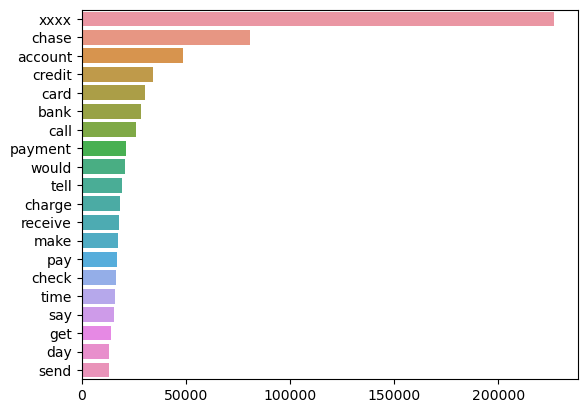

In [55]:
x=[x for x,y in result.most_common(20)]
y=[y for x,y in result.most_common(20)]

sns.barplot(x=y,y=x,orient='h')

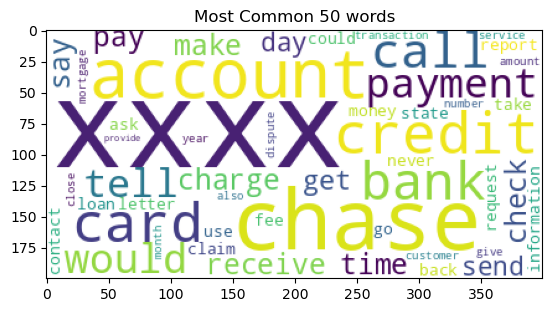

In [56]:
from wordcloud import WordCloud
cloud=WordCloud(background_color='white',max_words=50,stopwords=False).generate_from_frequencies(result)
plt.imshow(cloud)
plt.title("Most Common 50 words")
plt.show()

In [57]:
from nltk import bigrams
bigram_all_words=bigrams(all_words)
result_bigrams = FreqDist(bigram_all_words)

In [58]:
result_bigrams.most_common(10)

[(('xxxx', 'xxxx'), 96411),
 (('credit', 'card'), 12833),
 (('chase', 'bank'), 12819),
 (('xxxx', 'chase'), 5486),
 (('call', 'chase'), 4929),
 (('credit', 'report'), 3940),
 (('chase', 'xxxx'), 3528),
 (('check', 'account'), 3159),
 (('customer', 'service'), 3062),
 (('account', 'xxxx'), 3052)]

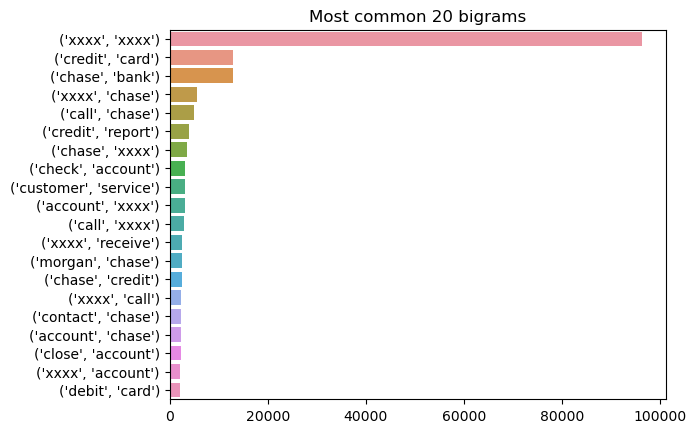

In [59]:
x=[str(x) for x,y in result_bigrams.most_common(20)]
y=[y for x,y in result_bigrams.most_common(20)]

sns.barplot(x=y,y=x,orient='h')
plt.title("Most common 20 bigrams")
plt.show()

In [60]:
result_bigrams

FreqDist({('xxxx', 'xxxx'): 96411, ('credit', 'card'): 12833, ('chase', 'bank'): 12819, ('xxxx', 'chase'): 5486, ('call', 'chase'): 4929, ('credit', 'report'): 3940, ('chase', 'xxxx'): 3528, ('check', 'account'): 3159, ('customer', 'service'): 3062, ('account', 'xxxx'): 3052, ...})

In [61]:
top_bigrams={}
for x,y in sorted(result_bigrams.items(),key=lambda x:x[1] ,reverse=True):
    top_bigrams.update({'_'.join(x):y})
    if len(top_bigrams)>MOST_COMMON_COUNT:
        break   

In [62]:
import collections

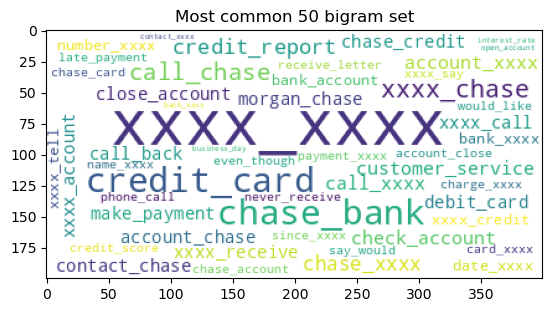

In [63]:
bigram_cloud = WordCloud(background_color='white',max_words=50,font_step=2).generate_from_frequencies(collections.ChainMap(top_bigrams))
plt.imshow(bigram_cloud)
plt.title("Most common 50 bigram set")
plt.show()

In [64]:
#lets define the function for the derieving the column with the text which are only now using the POS tagger

In [65]:
def word_tagger(x):
    x=x.lower()
    x=[{token.text:token.tag_} for token in model(x) if (token.text not in stop_word_list or not str(token.text).isalnum) and token.tag_=='NN']
    return x

clean_df.complaint_what_happened.head().apply(lambda x : word_tagger(x))

1     [{'morning': 'NN'}, {'name': 'NN'}, {'stop': '...
2     [{'xxxx': 'NN'}, {'card': 'NN'}, {'agent': 'NN...
10    [{'card': 'NN'}, {'application': 'NN'}, {'iden...
11    [{'xxxx': 'NN'}, {'ticket': 'NN'}, {'offer': '...
14    [{'son': 'NN'}, {'chase': 'NN'}, {'account': '...
Name: complaint_what_happened, dtype: object

In [66]:
clean_df['complaint_NN_words']=clean_df.complaint_what_happened.apply(lambda x : word_tagger(x))

In [67]:
clean_df.complaint_NN_words.head().apply(lambda x : ' '.join([''.join(data.keys()) for data in x]))

1     morning name stop bank debt verification state...
2     xxxx card agent anniversary date agent informa...
10    card application identity consent credit ident...
11    xxxx ticket offer ticket card information offe...
14    son chase account fund chase bank account mone...
Name: complaint_NN_words, dtype: object

In [68]:
clean_df['complaint_NN_sentence']=clean_df.complaint_NN_words.apply(lambda x : ' '.join([''.join(data.keys()) for data in x]))

<AxesSubplot: >

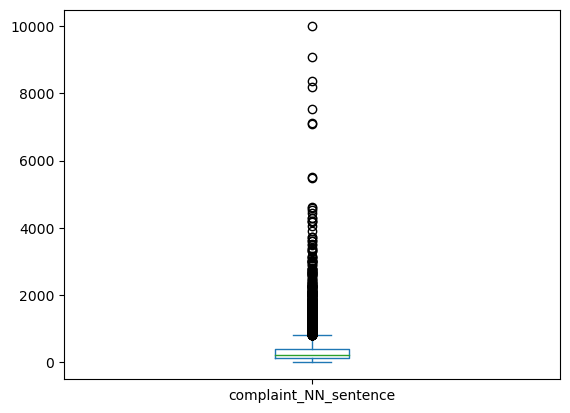

In [69]:
#identifying the complaint length
clean_df.complaint_NN_sentence.apply(lambda x : len(x)).plot(kind='box')

In [70]:
clean_df.complaint_NN_sentence.apply(lambda x : len(x)).describe()

count    21072.000000
mean       318.172883
std        358.512657
min          0.000000
25%        118.000000
50%        225.000000
75%        401.000000
max       9990.000000
Name: complaint_NN_sentence, dtype: float64

In [71]:
clean_df.head()

,complaint_id,complaint_what_happened,clean_complain,complain_lemma,complaint_NN_words,complaint_NN_sentence
1,3229299,Good morning my name is XXXX XXXX and I apprec...,good morning name xxxx xxxx appreciate could h...,"[good, morning, name, xxxx, xxxx, appreciate, ...","[{'morning': 'NN'}, {'name': 'NN'}, {'stop': '...",morning name stop bank debt verification state...
2,3199379,I upgraded my XXXX XXXX card in XX/XX/2018 and...,upgraded xxxx xxxx card xx told agent upgrade ...,"[upgrade, xxxx, xxxx, card, tell, agent, upgra...","[{'xxxx': 'NN'}, {'card': 'NN'}, {'agent': 'NN...",xxxx card agent anniversary date agent informa...
10,3233499,Chase Card was reported on XX/XX/2019. However...,chase card reported xx however fraudulent appl...,"[chase, card, report, however, fraudulent, app...","[{'card': 'NN'}, {'application': 'NN'}, {'iden...",card application identity consent credit ident...
11,3180294,"On XX/XX/2018, while trying to book a XXXX XX...",xx trying book xxxx xxxx ticket came across of...,"[try, book, xxxx, xxxx, ticket, come, across, ...","[{'xxxx': 'NN'}, {'ticket': 'NN'}, {'offer': '...",xxxx ticket offer ticket card information offe...
14,3224980,my grand son give me check for {$1600.00} i de...,grand son give check deposit chase account fun...,"[grand, son, give, check, deposit, chase, acco...","[{'son': 'NN'}, {'chase': 'NN'}, {'account': '...",son chase account fund chase bank account mone...


In [72]:
# ' '.join (clean_df.complaint_NN_sentence)
result_bigrams = bigrams(' '.join (clean_df.complaint_NN_sentence).split())
result = FreqDist(result_bigrams)
result.most_common(10)

[(('credit', 'card'), 11056),
 (('xxxx', 'xxxx'), 4277),
 (('credit', 'report'), 3259),
 (('chase', 'credit'), 3046),
 (('customer', 'service'), 2998),
 (('account', 'chase'), 2952),
 (('account', 'account'), 2871),
 (('chase', 'account'), 2848),
 (('bank', 'account'), 2403),
 (('checking', 'account'), 2196)]

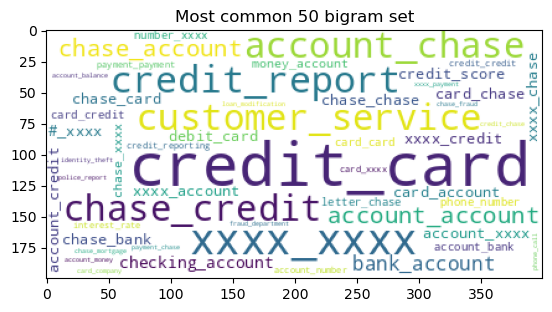

In [73]:
top_bigrams={}
for x,y in sorted(result.items(),key=lambda x:x[1] ,reverse=True):
    top_bigrams.update({'_'.join(x):y})
    if len(top_bigrams)>MOST_COMMON_COUNT:
        break   

result_bigrams = bigrams(clean_df.complaint_NN_sentence)
bigram_cloud = WordCloud(background_color='white',max_words=50,font_step=2).generate_from_frequencies(top_bigrams)
plt.imshow(bigram_cloud)
plt.title("Most common 50 bigram set")
plt.show()

In [74]:
from nltk import trigrams
result_trigrams = trigrams(' '.join (clean_df.complaint_NN_sentence).split())
result = FreqDist(result_trigrams)
result.most_common(10)

[(('chase', 'credit', 'card'), 1690),
 (('xxxx', 'xxxx', 'xxxx'), 964),
 (('credit', 'card', 'account'), 872),
 (('credit', 'card', 'company'), 817),
 (('credit', 'card', 'chase'), 755),
 (('xxxx', 'credit', 'card'), 718),
 (('credit', 'card', 'credit'), 620),
 (('card', 'credit', 'card'), 441),
 (('chase', 'checking', 'account'), 424),
 (('credit', 'card', 'xxxx'), 402)]

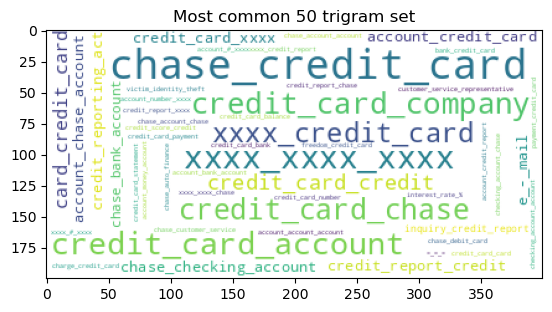

In [75]:
top_trigrams={}
for x,y in sorted(result.items(),key=lambda x:x[1] ,reverse=True):
    top_trigrams.update({'_'.join(x):y})
    if len(top_trigrams)>MOST_COMMON_COUNT:
        break   
trigram_cloud = WordCloud(background_color='white',max_words=50,font_step=3).generate_from_frequencies(top_trigrams)
plt.imshow(trigram_cloud)
plt.title("Most common 50 trigram set")
plt.show()

In [76]:
clean_df['complaint_NN_sentence']=clean_df.complaint_NN_sentence.apply(lambda x: x.replace('xxxx','').strip())

In [77]:
clean_df.complaint_NN_sentence

1        morning name stop bank debt verification state...
2        card agent anniversary date agent information ...
10       card application identity consent credit ident...
11       ticket offer ticket card information offer min...
14       son chase account fund chase bank account mone...
                               ...                        
78303    chase card customer decade credit chase bonus ...
78309    credit card provider claim purchase protection...
78310    pay risk chase bank app chase banking merchant...
78311    credit yrs chase credit chase freedom balance ...
78312    order line credit account payment payment cred...
Name: complaint_NN_sentence, Length: 21072, dtype: object

### Lets begin derieving the topics

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer(max_df=.95,min_df=.02)
x=count_vector.fit_transform(clean_df.complaint_NN_sentence)
#training the count vectorizer for future usage.

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector=TfidfVectorizer()
x=tfidf_vector.fit_transform(clean_df.complaint_NN_sentence)

In [80]:
tfidf_vector.vocabulary_

{'morning': 6338,
 'name': 6453,
 'stop': 9317,
 'bank': 956,
 'debt': 2626,
 'verification': 10424,
 'statement': 9250,
 'mail': 5849,
 'month': 6308,
 'right': 8408,
 'information': 5022,
 'consumer': 2193,
 'chase': 1698,
 'account': 186,
 'advance': 319,
 'help': 4571,
 'card': 1499,
 'agent': 388,
 'anniversary': 550,
 'date': 2582,
 'order': 6799,
 'consent': 2158,
 'recording': 7979,
 'application': 620,
 'identity': 4806,
 'credit': 2436,
 'applicant': 618,
 'ticket': 9845,
 'offer': 6706,
 'minute': 6141,
 'screen': 8649,
 'decision': 2647,
 'notification': 6601,
 'representative': 8219,
 'request': 8240,
 'fact': 3726,
 'report': 8193,
 'error': 3482,
 'son': 9081,
 'fund': 4177,
 'money': 6290,
 'check': 1732,
 'owner': 6919,
 'country': 2354,
 'time': 9857,
 'number': 6623,
 'claim': 1827,
 'inquiry': 5080,
 'debit': 2621,
 'branch': 1277,
 'customer': 2538,
 'service': 8762,
 'deposit': 2770,
 'place': 7253,
 'employment': 3372,
 'associate': 753,
 'business': 1391,
 'day'

In [81]:
len(tfidf_vector.vocabulary_.keys())

10871

In [82]:
tfidf_vector=TfidfVectorizer(max_df=.95,min_df=2)
x=tfidf_vector.fit_transform(clean_df.complaint_NN_sentence)
len(tfidf_vector.vocabulary_.keys())

5583

In [83]:
feature_vector_clean_df=pd.DataFrame(data=x.toarray(),columns=tfidf_vector.get_feature_names_out())

In [84]:
feature_vector_clean_df.iloc[0,:][feature_vector_clean_df.iloc[0,:]!=0]

account         0.086772
advance         0.276787
bank            0.215698
chase           0.075676
consumer        0.198974
debt            0.586956
help            0.208994
information     0.133915
mail            0.185182
month           0.165668
morning         0.243685
name            0.168098
right           0.250717
statement       0.179945
stop            0.319458
verification    0.266864
Name: 0, dtype: float64

In [85]:
clean_df.complaint_NN_sentence[1]

'morning name stop bank debt verification statement bank debt mail month debt right information consumer chase account #  advance help'

In [86]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=5,random_state=40)
nmf_model.fit(x)

NMF(n_components=5, random_state=40)

In [87]:
nmf_model.components_.shape  #here we have 5 topics now lets use the tfidf feature name to extract the exactword

(5, 5583)

In [88]:
for i,topic in enumerate(nmf_model.components_):
    print(f"====TOPIC cluster: {i} =======")
    print('_'.join([tfidf_vector.get_feature_names_out()[i] for i in topic.argsort()[-20:]]))
    print('\n\n')


====TOPIC cluster: 0 =======
name_amount_time_phone_customer_day_information_claim_transaction_fraud_business_number_deposit_checking_branch_chase_check_money_bank_account



====TOPIC cluster: 1 =======
email_visa_customer_transaction_fee_service_debit_letter_time_phone_purchase_number_merchant_company_dispute_fraud_charge_credit_chase_card



====TOPIC cluster: 2 =======
insurance_application_debt_company_income_escrow_process_rate_information_sale_time_house_letter_foreclosure_property_modification_home_chase_mortgage_loan



====TOPIC cluster: 3 =======
act_letter_bureau_file_application_history_card_company_theft_bureaus_limit_identity_information_account_reporting_debt_score_inquiry_report_credit



====TOPIC cluster: 4 =======
history_car_credit_error_account_day_transfer_chase_time_auto_rate_bill_date_amount_fee_statement_month_interest_balance_payment





In [89]:
nmf_model = NMF(n_components=10,random_state=40)
nmf_model.fit(x)
for i,topic in enumerate(nmf_model.components_):
    print(f"====TOPIC cluster: {i} =======")
    print('_'.join([tfidf_vector.get_feature_names_out()[i] for i in topic.argsort()[-30:]]))
    print('\n\n')

====TOPIC cluster: 0 =======
coupon_security_today_someone_explanation_representative_letter_relationship_identity_overdraft_time_notice_banker_closure_bonus_banking_customer_name_information_activity_number_access_balance_deposit_business_reason_branch_chase_checking_account



====TOPIC cluster: 1 =======
cash_anything_slate_pin_mail_someone_bill_month_service_customer_sapphire_year_score_fraud_business_bonus_amazon_purchase_time_reason_application_visa_limit_offer_freedom_company_debit_chase_credit_card



====TOPIC cluster: 2 =======
paperwork_program_request_refinance_company_debt_attorney_closing_equity_assistance_lender_insurance_letter_bankruptcy_year_application_income_escrow_process_rate_time_sale_house_foreclosure_property_chase_modification_home_mortgage_loan



====TOPIC cluster: 3 =======
collection_section_bank_auto_name_police_victim_verification_authorization_proof_consumer_knowledge_act_application_file_bureau_letter_history_limit_company_theft_bureaus_identity_inform

In [90]:
nmf_model = NMF(n_components=15,random_state=40)
nmf_model.fit(x)
for i,topic in enumerate(nmf_model.components_):
    print(f"====TOPIC cluster: {i} =======")
    print('_'.join([tfidf_vector.get_feature_names_out()[i] for i in topic.argsort()[-30:]]))
    print('\n\n')

====TOPIC cluster: 0 =======
someone_today_opening_security_status_knowledge_user_relationship_debit_number_theft_information_coupon_explanation_notice_banker_banking_bonus_identity_closure_overdraft_name_activity_access_branch_business_deposit_reason_checking_account



====TOPIC cluster: 1 =======
user_use_time_reward_slate_anything_store_gift_cash_replacement_month_chip_mail_service_name_bill_someone_sapphire_bonus_pin_amazon_offer_fraud_freedom_purchase_visa_credit_company_debit_card



====TOPIC cluster: 2 =======
appraisal_foreclosure_agreement_documentation_program_amount_paperwork_property_refinance_house_information_letter_officer_finance_rate_closing_vehicle_equity_title_time_income_process_lender_student_application_auto_car_home_modification_loan



====TOPIC cluster: 3 =======
fico_agency_decision_user_impact_utilization_bankruptcy_consumer_rating_business_increase_card_year_act_letter_time_file_chase_bank_reason_bureau_line_report_bureaus_history_application_reporting_lim

In [91]:
#categorrizzation with 10 topic seems reeasonable as with the 5 there is more mixuup of releated things across topics
# and with the 15 it looks very vague categorization 

In [92]:
nmf_model = NMF(n_components=10,random_state=40)
nmf_model.fit(x)
for i,topic in enumerate(nmf_model.components_):
    print(f"====TOPIC cluster: {i} =======")
    print([tfidf_vector.get_feature_names_out()[i] for i in topic.argsort()[-30:]])
    print('\n')
    
'''
topic 0: bank account service
topic 1: prepaid/credit card
topic 2: loan/mortgage
topic 3: fraud/theft/dispute reporting
topic 4: bank account service
topic 5: bank account service
topic 6: loan/mortgage
topic 7: others
topic 8: others
topic 9: fraud/theft/dispute reporting
'''

====TOPIC cluster: 0 =======
['coupon', 'security', 'today', 'someone', 'explanation', 'representative', 'letter', 'relationship', 'identity', 'overdraft', 'time', 'notice', 'banker', 'closure', 'bonus', 'banking', 'customer', 'name', 'information', 'activity', 'number', 'access', 'balance', 'deposit', 'business', 'reason', 'branch', 'chase', 'checking', 'account']


====TOPIC cluster: 1 =======
['cash', 'anything', 'slate', 'pin', 'mail', 'someone', 'bill', 'month', 'service', 'customer', 'sapphire', 'year', 'score', 'fraud', 'business', 'bonus', 'amazon', 'purchase', 'time', 'reason', 'application', 'visa', 'limit', 'offer', 'freedom', 'company', 'debit', 'chase', 'credit', 'card']


====TOPIC cluster: 2 =======
['paperwork', 'program', 'request', 'refinance', 'company', 'debt', 'attorney', 'closing', 'equity', 'assistance', 'lender', 'insurance', 'letter', 'bankruptcy', 'year', 'application', 'income', 'escrow', 'process', 'rate', 'time', 'sale', 'house', 'foreclosure', 'property', 

'\ntopic 0: bank account service\ntopic 1: prepaid/credit card\ntopic 2: loan/mortgage\ntopic 3: fraud/theft/dispute reporting\ntopic 4: bank account service\ntopic 5: bank account service\ntopic 6: loan/mortgage\ntopic 7: others\ntopic 8: others\ntopic 9: fraud/theft/dispute reporting\n'

In [93]:
nmf_model = NMF(n_components=7,random_state=40)
nmf_model.fit(x)
for i,topic in enumerate(nmf_model.components_):
    print(f"====TOPIC cluster: {i} =======")
    print([tfidf_vector.get_feature_names_out()[i] for i in topic.argsort()[-30:]])
    print('\n')
    

'''
topic 0: bank account service(but some reelated to fraud and disspute also)
topic 1: fraud/theft/dispute reporting (but some reelated to debit/credit card also)
topic 2: loan/mortgage
topic 3: fraud/theft/dispute reporting (other topics also )
topic 4: bank account service
topic 5: bank account service
topic 6: loan/mortgage
'''

#with 7 topic also it is confusing for some topic , lets select the 10 topic categorization and map it to the 5 cluster
# as required


====TOPIC cluster: 0 =======
['email', 'person', 'service', 'activity', 'department', 'someone', 'transfer', 'debit', 'letter', 'access', 'time', 'name', 'day', 'customer', 'reason', 'overdraft', 'phone', 'claim', 'transaction', 'deposit', 'business', 'information', 'fraud', 'number', 'branch', 'checking', 'chase', 'money', 'bank', 'account']


====TOPIC cluster: 1 =======
['mail', 'amount', 'case', 'offer', 'department', 'address', 'fee', 'call', 'information', 'refund', 'email', 'visa', 'claim', 'customer', 'purchase', 'service', 'debit', 'transaction', 'time', 'letter', 'number', 'phone', 'company', 'merchant', 'fraud', 'dispute', 'charge', 'credit', 'chase', 'card']


====TOPIC cluster: 2 =======
['closing', 'equity', 'complaint', 'attorney', 'request', 'bank', 'lender', 'assistance', 'year', 'bankruptcy', 'company', 'insurance', 'debt', 'application', 'income', 'escrow', 'rate', 'process', 'information', 'sale', 'time', 'house', 'letter', 'foreclosure', 'property', 'modification',

'\ntopic 0: bank account service(but some reelated to fraud and disspute also)\ntopic 1: fraud/theft/dispute reporting (but some reelated to debit/credit card also)\ntopic 2: loan/mortgage\ntopic 3: fraud/theft/dispute reporting (other topics also )\ntopic 4: bank account service\ntopic 5: bank account service\ntopic 6: loan/mortgage\n'

In [94]:
#final call is to create NMF for 10 component and create the categorization as below
'''
topic 0: bank account service
topic 1: prepaid/credit card
topic 2: loan/mortgage
topic 3: fraud/theft/dispute reporting
topic 4: bank account service
topic 5: bank account service
topic 6: loan/mortgage
topic 7: others
topic 8: others
topic 9: fraud/theft/dispute reporting
'''

'\ntopic 0: bank account service\ntopic 1: prepaid/credit card\ntopic 2: loan/mortgage\ntopic 3: fraud/theft/dispute reporting\ntopic 4: bank account service\ntopic 5: bank account service\ntopic 6: loan/mortgage\ntopic 7: others\ntopic 8: others\ntopic 9: fraud/theft/dispute reporting\n'

In [95]:
nmf_model = NMF(n_components=10,random_state=40)
nmf_model.fit(x)
for i,topic in enumerate(nmf_model.components_):
    print(f"====TOPIC cluster: {i} =======")
    print([tfidf_vector.get_feature_names_out()[i] for i in topic.argsort()[-20:]])
    print('\n')
    

====TOPIC cluster: 0 =======
['time', 'notice', 'banker', 'closure', 'bonus', 'banking', 'customer', 'name', 'information', 'activity', 'number', 'access', 'balance', 'deposit', 'business', 'reason', 'branch', 'chase', 'checking', 'account']


====TOPIC cluster: 1 =======
['sapphire', 'year', 'score', 'fraud', 'business', 'bonus', 'amazon', 'purchase', 'time', 'reason', 'application', 'visa', 'limit', 'offer', 'freedom', 'company', 'debit', 'chase', 'credit', 'card']


====TOPIC cluster: 2 =======
['lender', 'insurance', 'letter', 'bankruptcy', 'year', 'application', 'income', 'escrow', 'process', 'rate', 'time', 'sale', 'house', 'foreclosure', 'property', 'chase', 'modification', 'home', 'mortgage', 'loan']


====TOPIC cluster: 3 =======
['consumer', 'knowledge', 'act', 'application', 'file', 'bureau', 'letter', 'history', 'limit', 'company', 'theft', 'bureaus', 'identity', 'information', 'reporting', 'debt', 'score', 'inquiry', 'report', 'credit']


====TOPIC cluster: 4 =======
['mem

In [96]:
topic_predict=nmf_model.transform(x)


In [97]:
clean_df.shape

(21072, 6)

In [98]:
topic_predict.argmax(axis=1).shape

(21072,)

In [99]:
clean_df['topic_category']=topic_predict.argmax(axis=1)
clean_df.head()

,complaint_id,complaint_what_happened,clean_complain,complain_lemma,complaint_NN_words,complaint_NN_sentence,topic_category
1,3229299,Good morning my name is XXXX XXXX and I apprec...,good morning name xxxx xxxx appreciate could h...,"[good, morning, name, xxxx, xxxx, appreciate, ...","[{'morning': 'NN'}, {'name': 'NN'}, {'stop': '...",morning name stop bank debt verification state...,7
2,3199379,I upgraded my XXXX XXXX card in XX/XX/2018 and...,upgraded xxxx xxxx card xx told agent upgrade ...,"[upgrade, xxxx, xxxx, card, tell, agent, upgra...","[{'xxxx': 'NN'}, {'card': 'NN'}, {'agent': 'NN...",card agent anniversary date agent information ...,1
10,3233499,Chase Card was reported on XX/XX/2019. However...,chase card reported xx however fraudulent appl...,"[chase, card, report, however, fraudulent, app...","[{'card': 'NN'}, {'application': 'NN'}, {'iden...",card application identity consent credit ident...,1
11,3180294,"On XX/XX/2018, while trying to book a XXXX XX...",xx trying book xxxx xxxx ticket came across of...,"[try, book, xxxx, xxxx, ticket, come, across, ...","[{'xxxx': 'NN'}, {'ticket': 'NN'}, {'offer': '...",ticket offer ticket card information offer min...,3
14,3224980,my grand son give me check for {$1600.00} i de...,grand son give check deposit chase account fun...,"[grand, son, give, check, deposit, chase, acco...","[{'son': 'NN'}, {'chase': 'NN'}, {'account': '...",son chase account fund chase bank account mone...,5


In [100]:
'''
topic 0: bank account service
topic 1: prepaid/credit card
topic 2: loan/mortgage
topic 3: fraud/theft/dispute reporting
topic 4: bank account service
topic 5: bank account service
topic 6: loan/mortgage
topic 7: others
topic 8: others
topic 9: fraud/theft/dispute reporting
'''

'\ntopic 0: bank account service\ntopic 1: prepaid/credit card\ntopic 2: loan/mortgage\ntopic 3: fraud/theft/dispute reporting\ntopic 4: bank account service\ntopic 5: bank account service\ntopic 6: loan/mortgage\ntopic 7: others\ntopic 8: others\ntopic 9: fraud/theft/dispute reporting\n'

In [101]:
final_df.head(25)

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,None,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,Credit card debt,Yes,None,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,None,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,None,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,None,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,Conventional home mortgage,Yes,None,None,Consent not provided
4,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,None,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,General-purpose credit card or charge card,Yes,None,Charged too much interest,None
5,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,None,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,Checking account,Yes,None,Problem using a debit or ATM card,None
6,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,None,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,Checking account,Yes,None,Problem using a debit or ATM card,None
7,None,07753,3249272,Trouble during payment process,2019-05-15T12:00:00-05:00,NJ,None,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-05-21T12:00:00-05:00,Conventional home mortgage,Yes,None,None,None
8,None,60621,3351653,Closing an account,2019-08-22T12:00:00-05:00,IL,None,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-08-23T12:00:00-05:00,Checking account,Yes,None,Company closed your account,None
9,None,99354,3273612,Managing an account,2019-06-11T12:00:00-05:00,WA,None,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-17T12:00:00-05:00,Checking account,Yes,None,Cashing a check,None


In [102]:
#comparing with the original data the predicted topic categorizationlooks reasonable
#let rename the integer to the actual topic category

In [103]:
topic_mapping={0: 'bank account service',
 1: 'prepaid/credit card',
  2: 'loan/mortgage',
  3: 'fraud/theft/dispute reporting',
  4: 'bank account service',
  5: 'bank account service',
  6: 'loan/mortgage',
  7: 'others',
  8: 'others',
  9: 'fraud/theft/dispute reporting'}
topic_mapping

{0: 'bank account service',
 1: 'prepaid/credit card',
 2: 'loan/mortgage',
 3: 'fraud/theft/dispute reporting',
 4: 'bank account service',
 5: 'bank account service',
 6: 'loan/mortgage',
 7: 'others',
 8: 'others',
 9: 'fraud/theft/dispute reporting'}

In [104]:
clean_df['topic_category']=clean_df.topic_category.map(topic_mapping)

In [105]:
clean_df.shape

(21072, 7)

In [106]:
#getting rid of the unused object to reduce memory occupancy

In [107]:
del complaint_df

In [108]:
del final_df
del nonempty_complaints_df

NameError: name 'nonempty_complaints_df' is not defined

In [109]:
# del x
# del tfidf_vector

#### lets keep only what is needed and delete other dataframe as well 

In [110]:
training_dataset=clean_df[['complaint_what_happened','topic_category']]

In [111]:
del clean_df

In [112]:
training_dataset.head()

,complaint_what_happened,topic_category
1,Good morning my name is XXXX XXXX and I apprec...,others
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,prepaid/credit card
10,Chase Card was reported on XX/XX/2019. However...,prepaid/credit card
11,"On XX/XX/2018, while trying to book a XXXX XX...",fraud/theft/dispute reporting
14,my grand son give me check for {$1600.00} i de...,bank account service


In [113]:
training_dataset.shape

(21072, 2)

In [114]:
#lets backup this as the runtime is craashing frequently to save time to run further steps from this data what we
# havee derieved already

In [115]:
training_dataset.to_json('./final_trainable_data.json')

In [116]:
import pandas as pd
training_dataset=pd.read_json('./final_trainable_data.json')
#loading from the saved object instead of existing object from memory

In [117]:
tfidf_vector_result=tfidf_vector.transform(training_dataset.complaint_what_happened)

count_vector_result=count_vector.transform(training_dataset.complaint_what_happened)

In [118]:
# from sklearn.feature_extraction.text import CountVectorizer

# count_vector=CountVectorizer()
# count_vector_result=count_vector.fit_transform(training_dataset.complaint_what_happened)

#training it again might crash the system so its not a good idea to train on this corpus as it need to be cleaned 
# aagin , since we already have model trained on the cleaned set  we will be using that


In [119]:
training_dataset.head()

,complaint_what_happened,topic_category
1,Good morning my name is XXXX XXXX and I apprec...,others
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,prepaid/credit card
10,Chase Card was reported on XX/XX/2019. However...,prepaid/credit card
11,"On XX/XX/2018, while trying to book a XXXX XX...",fraud/theft/dispute reporting
14,my grand son give me check for {$1600.00} i de...,bank account service


In [120]:
count_vector_df=pd.DataFrame(data=count_vector_result.toarray(),columns=count_vector.get_feature_names_out())

del count_vector_result
count_vector_df.shape

(21072, 233)

In [122]:
training_dataset.shape

(21072, 2)

In [123]:
training_dataset=training_dataset.reset_index().drop(columns=['index'])

In [124]:
count_vector_df['topic']=training_dataset.topic_category

In [125]:
count_vector_df['topic']

0                               others
1                  prepaid/credit card
2                  prepaid/credit card
3        fraud/theft/dispute reporting
4                 bank account service
                     ...              
21067             bank account service
21068    fraud/theft/dispute reporting
21069    fraud/theft/dispute reporting
21070                    loan/mortgage
21071                    loan/mortgage
Name: topic, Length: 21072, dtype: object

In [126]:
topic_name_to_numeric={'bank account service': 0,
 'prepaid/credit card': 1,
 'loan/mortgage': 2,
 'fraud/theft/dispute reporting': 3,
 'others': 4}


In [127]:
count_vector_df.topic.isna().sum()

0

In [128]:
count_vector_df['topic']=count_vector_df['topic'].map(topic_name_to_numeric)
count_vector_df['topic'].head()

0    4
1    1
2    1
3    3
4    0
Name: topic, dtype: int64

In [129]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(count_vector_df.drop(columns=['topic']),count_vector_df['topic'],test_size=.25)

In [130]:
train_x.shape

(15804, 233)

In [131]:
test_x.shape

(5268, 233)

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [133]:
nb_model = MultinomialNB()
nb_model.fit(train_x,train_y)

MultinomialNB()

In [134]:
nb_model_predict=nb_model.predict(test_x)

In [136]:
accuracy = accuracy_score(test_y, nb_model_predict)
print("Accuracy:", accuracy)

Accuracy: 0.774677296886864


In [137]:
dt_model = DecisionTreeClassifier(min_samples_leaf=50)
dt_model.fit(train_x,train_y)
dt_model_predict=dt_model.predict(test_x)
accuracy = accuracy_score(test_y, dt_model_predict)
print("Accuracy:", accuracy)

Accuracy: 0.7186788154897494


In [138]:
rf_model = RandomForestClassifier(n_estimators=50,min_samples_leaf=50)
rf_model.fit(train_x,train_y)
rf_model_predict=rf_model.predict(test_x)
accuracy = accuracy_score(test_y, rf_model_predict)
print("Accuracy:", accuracy)

Accuracy: 0.7509491268033409


In [139]:
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_model.fit(train_x,train_y)
lr_model_predict=lr_model.predict(test_x)
accuracy = accuracy_score(test_y, lr_model_predict)
print("Accuracy:", accuracy)

Accuracy: 0.8735763097949886


/home/prason/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# del count_vector_result
# del count_vector_df
# del count_vector

In [140]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_vector=TfidfVectorizer()
# tfidf_vector_result=tfidf_vector.fit_transform(training_dataset.complaint_what_happened)

In [141]:
tfidf_vector_df=pd.DataFrame(data=tfidf_vector_result.toarray(),columns=tfidf_vector.get_feature_names_out())
tfidf_vector_df.shape

(21072, 5583)

In [142]:
training_dataset.shape

(21072, 2)

In [143]:
tfidf_vector_df['topic']=training_dataset.topic_category
topic_name_to_numeric={'bank account service': 0,
 'prepaid/credit card': 1,
 'loan/mortgage': 2,
 'fraud/theft/dispute reporting': 3,
 'others': 4}
tfidf_vector_df=tfidf_vector_df[~tfidf_vector_df.topic.isna()]
tfidf_vector_df['topic']=tfidf_vector_df['topic'].map(topic_name_to_numeric)
tfidf_vector_df['topic']

0        4
1        1
2        1
3        3
4        0
        ..
21067    0
21068    3
21069    3
21070    2
21071    2
Name: topic, Length: 21072, dtype: int64

In [146]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(tfidf_vector_df.drop(columns=['topic']),tfidf_vector_df['topic'],test_size=.25)

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [148]:
dt_model1 = DecisionTreeClassifier(min_samples_leaf=50)
dt_model1.fit(train_x,train_y)
dt_model1_predict=dt_model1.predict(test_x)
accuracy = accuracy_score(test_y, dt_model1_predict)
print("Accuracy:", accuracy)

Accuracy: 0.770501138952164


In [149]:
rf_model1 = RandomForestClassifier(n_estimators=50,min_samples_leaf=50)
rf_model1.fit(train_x,train_y)
rf_model1_predict=rf_model1.predict(test_x)
accuracy = accuracy_score(test_y, rf_model1_predict)
print("Accuracy:", accuracy)

Accuracy: 0.6564160971905847


In [150]:
lr_model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_model1.fit(train_x,train_y)
lr_model1_predict=lr_model1.predict(test_x)
accuracy = accuracy_score(test_y, lr_model1_predict)
print("Accuracy:", accuracy)

Accuracy: 0.79707668944571


/home/prason/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [151]:
nb_model1 = MultinomialNB()
nb_model1.fit(train_x,train_y)
nb_model1_predict=nb_model1.predict(test_x)
accuracy = accuracy_score(test_y, nb_model1_predict)
print("Accuracy:", accuracy)

Accuracy: 0.42482915717539865


In [152]:
#so as per the above comparision in terms of acccuracy metric, the logistic regression
# is performing better than the other
# algorithm, this can also reflect that the doing things in simple way might give the better result
# making it complex doesnot help always

#also we can know that the TF-IDF vectorizer is supposed to generalize the corpus more better and allow the model for better
#prediction than the simple count vectorizer which is just based on the word frequency count. however the trend is kind of 
#opposite in this case where the logistic regression trained with the simple count vectorized is giving the 
#best result if we measure it from the angle of accuracy.